In [1]:
import time
from robomaster import robot
from robomaster import camera
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
if __name__ == '__main__':
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="rndis")

    ep_camera = ep_robot.camera

    # 显示十秒图传
    ep_camera.start_video_stream(display=False, resolution=camera.STREAM_720P)
    time.sleep(10)
    img = ep_camera.read_cv2_image(strategy="newest")
    cv2.imshow("Robot", img)
    cv2.waitKey()
    time.sleep(1)
    filename = f"Test_camer.jpg"
    cv2.imwrite(filename, img)
    ep_camera.stop_video_stream()
    
    #print(f"Image saved as {filename}")
    ep_robot.close()

2024-08-28 20:44:38,658 ERROR conn.py:271 SdkConnection: RECV TimeOut!
2024-08-28 20:44:38,659 ERROR robot.py:1353 Robot: Connection Failed, Please Check Hareware Connections!!! conn_type rndis, host ('192.168.42.3', 10148), target ('192.168.42.2', 20020).
2024-08-28 20:44:38,659 ERROR client.py:70 Client: __init__, create Connection, exception: module 'robomaster.config' has no attribute 'DEFAULT_CONN_PROTO'
2024-08-28 20:44:38,659 ERROR client.py:153 Client: send_sync_msg, client recv_task is not running.
2024-08-28 20:44:38,659 ERROR client.py:153 Client: send_sync_msg, client recv_task is not running.
2024-08-28 20:44:38,659 ERROR client.py:153 Client: send_sync_msg, client recv_task is not running.
2024-08-28 20:44:38,659 ERROR client.py:153 Client: send_sync_msg, client recv_task is not running.
2024-08-28 20:44:38,659 ERROR client.py:153 Client: send_sync_msg, client recv_task is not running.


Robot: Can not connect to robot, check connection please.


TypeError: exceptions must derive from BaseException

In [2]:
img =cv2.imread('Test_camer.jpg')
print('Image size:', img.shape)

Image size: (720, 1280, 3)


In [16]:
# แปลงภาพจาก RGB เป็น HSL
hsl_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# แยกช่องสี L จากภาพ HSL
L_channel = hsl_image[:, :, 1]

# แสดงภาพในช่องสี L
cv2.imshow('L-channel Image', L_channel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# แปลงภาพจาก RGB เป็น HSL
hsl_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

# แยกช่องสี L จากภาพ HSL
L_channel = hsl_image[:, :, 1]

# คำนวณฮิสโตแกรมของช่องสี L
histogram = cv2.calcHist([L_channel], [0], None, [256], [0, 256])

# ปกติค่าในฮิสโตแกรมอาจมีค่ามากเกินกว่าที่จะวาดลงในภาพ จึงควรปรับสเกล
histogram = cv2.normalize(histogram, histogram, 0, 255, cv2.NORM_MINMAX)

# สร้างภาพสำหรับแสดงฮิสโตแกรม
hist_img = np.zeros((300, 256), dtype=np.uint8)

# วาดกราฟฮิสโตแกรมลงบนภาพ
for x in range(256):
    cv2.line(hist_img, (x, 300), (x, 300 - int(histogram[x])), (255, 255, 255))

# แสดงฮิสโตแกรม
cv2.imshow('Histogram of L-channel', hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


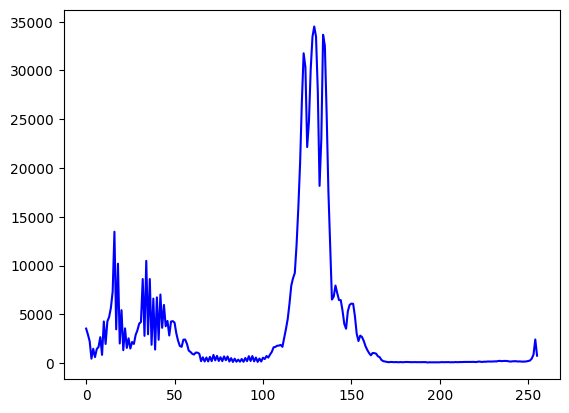

In [6]:
# คำนวณฮิสโตแกรมของช่องสี L
histogram = cv2.calcHist([L_channel], [0], None, [256], [0, 256])
plt.plot(histogram, color='b') 
#plt.title('Image Histogram For Blue Channel GFG') 
plt.show()

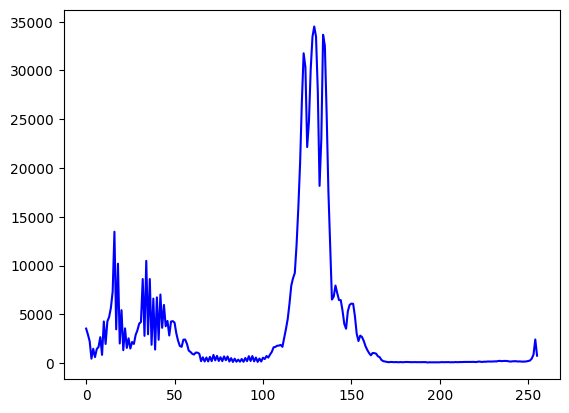

In [7]:
histogram = cv2.calcHist([hsl_image], [1], None, [256], [0, 256])
plt.plot(histogram, color='b') 
#plt.title('Image Histogram For Blue Channel GFG') 
plt.show()

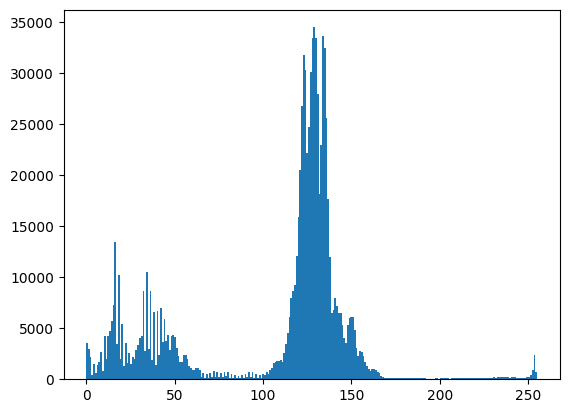

In [12]:
histogram = cv2.calcHist([hsl_image], [1], None, [256], [0, 256])
plt.hist(L_channel.ravel(),bins=256, range=[0, 255]) 
#plt.title('Image Histogram For Blue Channel GFG') 
plt.show()

In [14]:
# ปรับขนาดค่าพิกเซลในช่องสี L ให้อยู่ในช่วง [0, 1]
L_channel_normalized = L_channel / 255
# ปรับขนาดค่าพิกเซลในช่องสี L ให้อยู่ในช่วง [-1, 1]
L_channel_rescaled = 2 * L_channel_normalized - 1

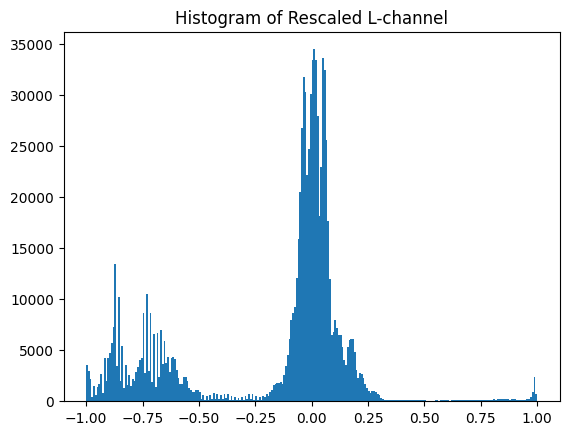

In [15]:
# F. Plot the histogram of the rescaled L-channel image
plt.figure()
plt.hist(L_channel_rescaled.ravel(), bins=256, range=[-1, 1])
plt.title('Histogram of Rescaled L-channel')
plt.show()


In [11]:
v = set()
for i in L_channel_rescaled:
    v.update(set(i))
print(v, "\n",len(v))

{-0.7333333333333334, -0.5215686274509803, -0.4980392156862745, 0.9921568627450981, 1.0, -0.8588235294117648, -0.8666666666666667, -0.8745098039215686, -0.8823529411764706, -0.8901960784313725, 0.9843137254901961, -0.9450980392156862, -0.9294117647058824, -0.9843137254901961, -0.7490196078431373, -0.7647058823529411, -0.6235294117647059, -0.607843137254902, -0.6392156862745098, -0.5686274509803921, -0.584313725490196, -0.5529411764705883, -0.5137254901960784, -0.4274509803921569, -0.388235294117647, -0.37254901960784315, -0.3176470588235294, -0.3019607843137255, -0.24705882352941178, -0.26274509803921564, -0.17647058823529416, -0.19215686274509802, -0.13725490196078427, -0.1215686274509804, -0.06666666666666665, -0.050980392156862786, -0.8352941176470589, -0.0117647058823529, -0.8431372549019608, -0.7176470588235294, -0.7254901960784313, -0.6, 0.0039215686274509665, -0.8509803921568627, 0.019607843137254832, -0.592156862745098, -0.9686274509803922, 0.09019607843137245, 0.05882352941176

In [ ]:
print(L_channel.shape)
print(L_channel)

# Create a random noise image with the same size as the original image
noise = np.random.normal(0, 1, L_channel.shape)

# Normalize the noise to fit within the 8-bit range (0-255) if needed
noise_image = cv2.normalize(noise, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Show the noise image
cv2.imshow('Random Noise Image', noise_image)
cv2.waitKey(0)
cv2.destroyAllWindows()